In [22]:
import acquisition
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
acquisition.updatedata()

In [4]:
title_data = pd.read_csv("titlebasics_edit.csv")
rating_data = pd.read_csv("ratings_edit.csv")

In [5]:
# sort and drop duplicates for title data
title_data.sort_values('tconst', inplace=True)
title_data.drop_duplicates(subset='tconst', keep='last', inplace=True)

# sort and drop data for ratings data
rating_data.sort_values('tconst', inplace=True)
rating_data.drop_duplicates(subset='tconst', keep='last', inplace=True)

In [7]:
# Merge title and rating dataframes into one (inner join)
data = pd.merge(left=title_data,right=rating_data, on='tconst')
data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45.0,Romance,5.4,81
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,20.0,"Documentary,News,Sport",5.2,310
2,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900.0,NaN,NaN,"Biography,Drama",6.2,39
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,NaN,70.0,"Biography,Crime,Drama",6.1,538
4,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907.0,NaN,NaN,Drama,4.8,14


In [70]:
df = data[['startYear','averageRating']]

In [74]:
mean = data.groupby('startYear').mean()
mean.head()

,isAdult,endYear,runtimeMinutes,averageRating,numVotes
startYear,,,,,
1894.0,0.0,NaN,45.0,5.400000,81.000000
1897.0,0.0,NaN,20.0,4.900000,169.500000
1898.0,0.0,NaN,1.0,3.563158,15.526316
1899.0,0.0,NaN,135.0,4.233333,23.666667
1900.0,0.0,NaN,66.0,5.120000,20.600000


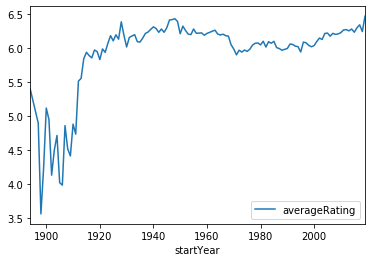

In [91]:
mean.plot(y='averageRating')

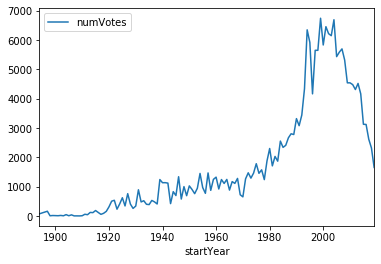

In [92]:
mean.plot(y='numVotes')

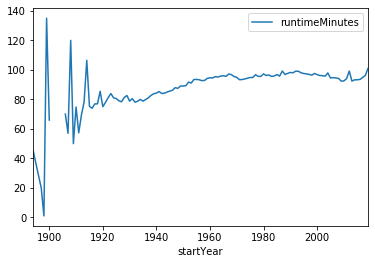

In [93]:
mean.plot(y='runtimeMinutes')

In [96]:
count = data.groupby('startYear').count()

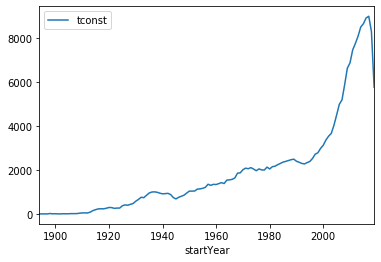

In [98]:
count.plot(y='tconst')

In [100]:
data.corr(method='pearson')

,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
isAdult,1.000000,-0.044652,NaN,-0.017190,-0.048690,-0.013540
startYear,-0.044652,1.000000,NaN,0.021466,0.033949,0.041174
endYear,NaN,NaN,NaN,NaN,NaN,NaN
runtimeMinutes,-0.017190,0.021466,NaN,1.000000,0.009102,0.019928
averageRating,-0.048690,0.033949,NaN,0.009102,1.000000,0.070277
numVotes,-0.013540,0.041174,NaN,0.019928,0.070277,1.000000
